<pre>
NAMA : ALIDIN
NIM  : F1D018006
KELAS: B

TUGAS 1 PERMODELAN DAN SIMULASI
</pre>

In [1]:
import pandas as pd
import matplotlib.pyplot as mpp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb

In [2]:
#data sudah dirapikan, perbaikan beberapa field data yang non numerik
dataFrame = pd.read_csv('Assessment_pemsis.csv')
dataFrame.head(None)

,Timestamp,nama,jajan,kuota
0,15/02/2021 08:46:25,arik,10000,10
1,15/02/2021 08:51:22,HASAN,12500,15
2,15/02/2021 08:51:55,RGH,50000,20
3,15/02/2021 08:52:09,RIZALDI RF,15000,5
4,15/02/2021 08:53:51,ALI,10000,30
...,...,...,...,...
73,16/02/2021 09:09:14,FR,22000,12
74,16/02/2021 09:09:42,RDNL,20000,10
75,16/02/2021 09:09:51,DAF,10000,10
76,16/02/2021 09:33:10,Harley,10000,18


## PREPROCESSING

In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  78 non-null     object
 1   nama       78 non-null     object
 2   jajan      78 non-null     int64 
 3   kuota      78 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.6+ KB


In [4]:
x = dataFrame.drop(columns=['Timestamp','nama'], axis=1)
x.head(10)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   jajan   78 non-null     int64
 1   kuota   78 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


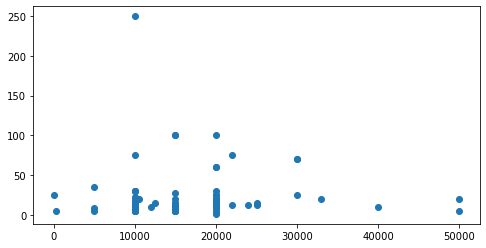

In [5]:
mpp.figure(figsize=(8,4))
mpp.scatter(x['jajan'], x['kuota'])

karena interval data x yakni "jajan" mahasiswa memiliki interval nilai data yang sangat besar jika dibandingkan y ("kuota"), maka perlu dilakukan normalisasi, normalisasi yang digunakan disini adalah normalisasi min max yang akan mengubah interval data menjadi antara 0 sampai 1.

In [6]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
scaled = pd.DataFrame(scaled,columns=['jajan','kuota'])

In [7]:
scaled.head(None)

,jajan,kuota
0,0.20,0.036145
1,0.25,0.056225
2,1.00,0.076305
3,0.30,0.016064
4,0.20,0.116466
...,...,...
73,0.44,0.044177
74,0.40,0.036145
75,0.20,0.036145
76,0.20,0.068273


In [8]:
clusters = []
for i in range(1,12):
    km = KMeans(n_clusters=i).fit(scaled)
    clusters.append(km.inertia_)

metode elbow sendiri digunakan untuk mencoba satu pertu jumlah cluster (di code mengunakan jumlah cluster dari 1 sampai 12) dengan terus melakuakn KMeans sehingga didapatkan jumah  yang cocok untuk pola data yang ada.perlu dilakukannya secara manual untuk mencari elbow, yaitu dengan melihat titik dimana penurunan inersia tidak lagi signifikan.

Text(0, 0.5, 'inertia')

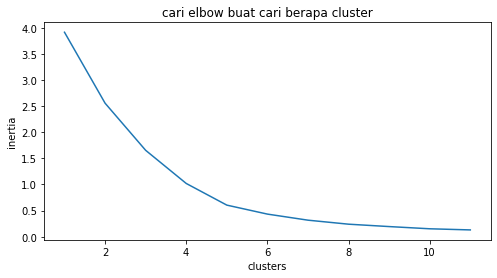

In [9]:
fig,ax = mpp.subplots(figsize = (8,4))
sb.lineplot(x=list(range(1,12)),y=clusters, ax = ax)
ax.set_title("cari elbow buat cari berapa cluster")
ax.set_xlabel("clusters")
ax.set_ylabel("inertia")

dengan memperhatikan plot elbow diatas, maka diketahui jumlah cluster yang optimal adalah 4 ataupun 5, tetapi disini saya memilih 4 sebagai jumlah cluster untuk dilanjutkan ke tahap selanjutnya

## Clustering data

<p>
sebelumya sudah diketahui bahwa jumlah cluster atau kelompok data adalah 4, selanjutnya adalah memetakan data berdasarkan kelompoknya masing masing menggunakan centoid (pusat keanggotaan yang akan mempengaruhi data data sekitarnya apakah termasuk anggota dari centoid atau tidak [dihitung berdasarkan jarak]). pemetaan cluster menggunakan algoritma k-means, dimana pada awalnya 4 centoid ditempatkan pada lokasi 4 data acak, kemudian 4 centoid tersebut akan dicarikan data data yang berada di dekatnya (pemetaan cluster), dihitung berapa jarak rata rata antara titik data terdekat dengan centoid, kemdudian setelah itu berdasarkan jarak rata rata tersebut centoid lama akan dipindahkan ke posisi centoid baru yang mencakup keanggotaan data yang lebih stabil. hal ini terus berulang sampai posisi centoid tidak berpindah.
</p>

In [10]:
km = KMeans(n_clusters=5).fit(scaled)
scaled['Labels'] = km.labels_
scaled

,jajan,kuota,Labels
0,0.20,0.036145,0
1,0.25,0.056225,0
2,1.00,0.076305,1
3,0.30,0.016064,0
4,0.20,0.116466,0
...,...,...,...
73,0.44,0.044177,2
74,0.40,0.036145,2
75,0.20,0.036145,0
76,0.20,0.068273,0


melakukan ploting centroid berdasarkan hasil label dari KMeans :

In [11]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(scaled[['jajan','kuota']],scaled["Labels"])
centroid = clf.centroids_
centroid = pd.DataFrame(centroid,columns=['x','y'])
centroid

,x,y
0,0.217195,0.049466
1,0.933333,0.042838
2,0.432500,0.056894
3,0.404444,0.312807
4,0.200000,1.000000


Text(0.5, 1.0, 'KMeans dengan 5 Cluster')

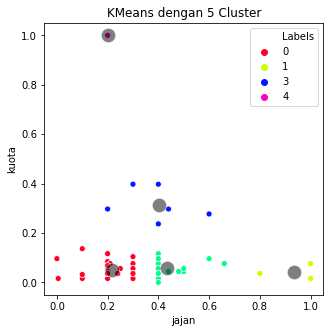

In [13]:
mpp.figure(figsize=(5,5))
sb.scatterplot(scaled['jajan'], scaled['kuota'], hue=scaled['Labels'],palette="gist_rainbow")
sb.scatterplot(centroid['x'], centroid['y'], color="black",alpha=0.5, s = 200, marker = 'o')
mpp.xlabel("jajan")
mpp.ylabel("kuota")
mpp.title('KMeans dengan 5 Cluster')

<pre>
titik hitam tranparan adalah centroid dari masing masing cluster
hasil dari clustering bisa dilihat dari plot diatas, dimana ada 4 jenis pengelompokan mahasiswa, yakni sebagai berikut :
1. biru   : (boros kuota hemat jajan) penggunaan kuota mengengah keatas, jajan normal  
2. merah  : (hemat kuota hemat jajan) penggunaan kuota rendah, jajan rendah
3. cyan   : (hemat kuota normal jajan) penggunaan kuota rendah, jajan mengengah
4. kuning : (hemat kuota boros jajan) penggunaan kuota rendah, jajan tinggi
5. pink   : (boros kuota tidak normal, jajan normal-hemat) // terpisah dari data data lainn
</pre>

permodelan ini sendri dilakukan untuk mendapatkan informasi berupa pengelompokan mahasiswa berdasarkan pengeluaran uang jajan dan kuota, jadi ketika ada data baru yang masuk kedepannya dapat langsung langsung di ketahui bawah mahawasiswa tersebut termasuk boros atau tidak berdasarkan pola data yang sudah ada.
